<a href="https://colab.research.google.com/github/MounikaAnnapureddy/IT-496/blob/main/MounikaA_RadarChart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import math
# create a dataframe for our alternative analysis matrix
df=pd.DataFrame(columns=['criteria','weight','ratingA','ratingB','scoreA','scoreB'])
print(df)

Empty DataFrame
Columns: [criteria, weight, ratingA, ratingB, scoreA, scoreB]
Index: []


In [10]:
#first step: add a list of criteria
df['criteria']=['risk','ROI','customerSatisfaction','feasibility','strategicAlignment']
print(df)

               criteria weight ratingA ratingB scoreA scoreB
0                  risk    NaN     NaN     NaN    NaN    NaN
1                   ROI    NaN     NaN     NaN    NaN    NaN
2  customerSatisfaction    NaN     NaN     NaN    NaN    NaN
3           feasibility    NaN     NaN     NaN    NaN    NaN
4    strategicAlignment    NaN     NaN     NaN    NaN    NaN


In [11]:
#second step: identify weights
df['weight']=[0.1,0.15,0.3,0.15,0.3]
print(df)

               criteria  weight ratingA ratingB scoreA scoreB
0                  risk    0.10     NaN     NaN    NaN    NaN
1                   ROI    0.15     NaN     NaN    NaN    NaN
2  customerSatisfaction    0.30     NaN     NaN    NaN    NaN
3           feasibility    0.15     NaN     NaN    NaN    NaN
4    strategicAlignment    0.30     NaN     NaN    NaN    NaN


In [13]:
#third step: rate each alternative across all criteria
df['ratingA']=[4,1,2,1,5]
df['ratingB']=[3,4,2,3,2]
#step 4: calculate partial scores by multiplying weight * ratings
for index,row in df.iterrows():
  df['scoreA'][index]=row['ratingA']*row['weight']
  df['scoreB'][index]=row['ratingB']*row['weight']

print(df)

               criteria  weight  ratingA  ratingB scoreA scoreB
0                  risk    0.10        4        3    0.4    0.3
1                   ROI    0.15        1        4   0.15    0.6
2  customerSatisfaction    0.30        2        2    0.6    0.6
3           feasibility    0.15        1        3   0.15   0.45
4    strategicAlignment    0.30        5        2    1.5    0.6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [14]:
#step 5: add partial scores to get total scores
totalScoreA=0
totalScoreB=0
for index,row in df.iterrows():
  totalScoreA+=row['scoreA']
  totalScoreB+=row['scoreA']

print(df)

               criteria  weight  ratingA  ratingB scoreA scoreB
0                  risk    0.10        4        3    0.4    0.3
1                   ROI    0.15        1        4   0.15    0.6
2  customerSatisfaction    0.30        2        2    0.6    0.6
3           feasibility    0.15        1        3   0.15   0.45
4    strategicAlignment    0.30        5        2    1.5    0.6


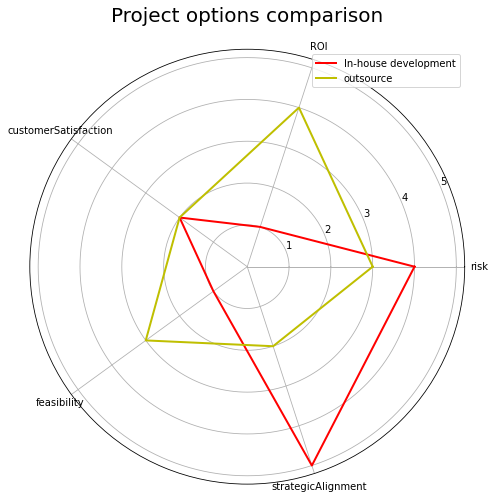

In [21]:
import numpy as np
import matplotlib.pyplot as plt
axisLocations = np.linspace(start=0, stop=2 * np.pi, num=len(df['ratingA']), endpoint=False)
axisLocations = np.concatenate((axisLocations,[axisLocations[0]]))
ratingsA=df['ratingA']
ratingsB=df['ratingB']
ratingsACircular=np.concatenate((ratingsA,[ratingsA[0]], ))
ratingsBCircular=np.concatenate((ratingsB,[ratingsB[0]]))
plt.figure(figsize=(8,8))
plt.subplot(polar=True)
plt.plot(axisLocations,ratingsACircular,'r-', linewidth=2, label='In-house development')
plt.plot(axisLocations,ratingsBCircular,'y-', linewidth=2, label='outsource')
plt.title('Project options comparison', size=20)
lines, labels =plt.thetagrids(np.degrees(axisLocations), labels=df['criteria'])
plt.legend()
plt.show()